# 6. Пространственные методы обработки изображений - Individual

In [22]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [23]:
# функция ввода изображения
def img_input(img_path, size=(0,0), type=1):
    img = cv2.imread(img_path,type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img

# функция вывода изображения
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

## 1. Создать файл с зашумлением изображения шумом типа соль-перец.

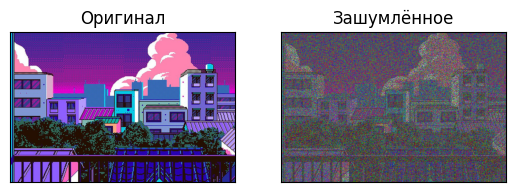

In [24]:
red, green, blue = (255, 0, 0), (0, 255, 0), (0, 0, 255)
rgb = [red, green, blue]


def sp_noise(image, prob):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn > thres:
                output[i][j] = random.choice(rgb)
            else:
                output[i][j] = image[i][j]

    return output


image = img_input('img/ind.jpg', size=(1200, 797))
noise_img = sp_noise(image, 0.8)

title = ['Оригинал', 'Зашумлённое']
res = [image, noise_img]

img_print(res, title)

## 2. Провести сглаживание изображения с помощью функции cv2.filter2D (), используя ядро 10×10.

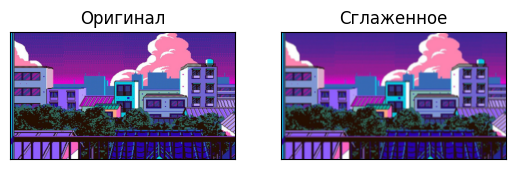

In [25]:
image = img_input('img/ind.jpg',size=(1280,720))

kernel = np.ones((10,10),np.float32)/100
dst = cv2.filter2D(image,-1,kernel)

title = ['Оригинал', 'Сглаженное']
res = [image, dst]

img_print(res, title)

## 3. Провести усреднение изображения с помощью функции cv2.blur (), используя ядро 10×10.


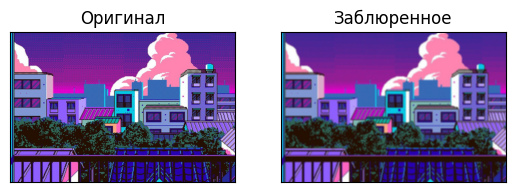

In [26]:
image = img_input('img/ind.jpg')

blur = cv2.blur(image,(10,10))

title = ['Оригинал', 'Заблюренное']
res = [image, blur]

img_print(res, title)

### 4. Добавить к исходному изображению 20–50% шума. Провести медианную фильтрацию изображения, используя ядро 5*5.

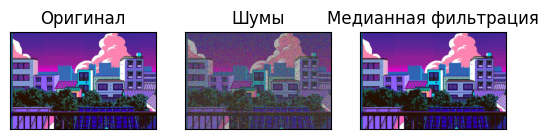

In [27]:
image = img_input('img/ind.jpg')


mash =sp_noise(image, 0.5)
median = cv2.medianBlur(image,5)


title = ['Оригинал', 'Шумы', 'Медианная фильтрация']
res = [image, mash, median]

img_print(res, title)

## 5. Создать файл с изображением, который обязательно содержит вертикальные и горизонтальные линии. С помощью оператора Превитта обнаружить и выделить эти линии.

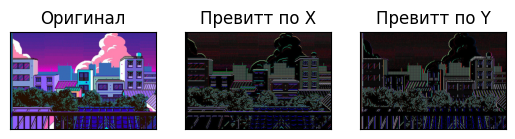

In [28]:
image = img_input('img/ind.jpg')

# Создаем ядро (маску) для x и y
x_mask = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
y_mask = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Функция соединения изображения с ядром (в данном случае с X, то есть выбраны будут горизонтальные линии), здесь -1 –это глубина изображения (если значение отрицательное, то глубина соответствует исходному изображению, как и cv2.CV_64F)
img_prewittx = cv2.filter2D(image, -1, x_mask)

# Соединение изображения с ядром Y, выбор вертикальных линий
img_prewitty = cv2.filter2D(image, -1, y_mask)

res = [image, img_prewittx, img_prewitty]
title = ['Оригинал', 'Превитт по X', 'Превитт по Y']

img_print(res, title)